In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds


# Step 1: Load MovieLens 100k data from file or URL
url = 'https://files.grouplens.org/datasets/movielens/ml-100k/u.data'
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv(url, sep='\t', names=column_names)

# Create a pivot table (user-item matrix) for ratings
ratings_matrix = df.pivot(index='user_id', columns='item_id', values='rating')
 

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds
 
# Step 3: Identify non-NA entries in the ratings matrix
non_na_mask = ratings_matrix.notna()

# Convert mask to a list of non-NA (user, item) pairs
non_na_indices = np.argwhere(non_na_mask.values)  # Get (row, col) indices of non-NA values

# Randomly select 20% of non-NA entries to introduce missing data
n_remove = int(0.2 * len(non_na_indices))  # 20% of available data
remove_indices = np.random.choice(np.arange(len(non_na_indices)), size=n_remove, replace=False)

# Save the original values that will be removed for later evaluation
original_values = ratings_matrix.copy()

# Step 4: Introduce missing values
ratings_matrix_masked = ratings_matrix.copy()

# Set the selected 20% of data points to NaN
for index in remove_indices:
    row, col = non_na_indices[index]  # Get the (row, col) pair
    ratings_matrix_masked.iloc[row, col] = np.nan  # Set the value at that position to NaN

# Step 5: Fill the missing values with 0 for SVD input (other methods can be used here)
R_filled = ratings_matrix_masked.fillna(0).values

# Step 6: Apply SVD (Singular Value Decomposition)
# Decompose the matrix using SVD
U, sigma, Vt = svds(R_filled, k=50)  # Using 50 latent factors
sigma = np.diag(sigma)  # Convert sigma (1D array) to a diagonal matrix

# Reconstruct the matrix using the decomposed matrices
R_predicted = np.dot(np.dot(U, sigma), Vt)

# Step 7: Evaluate performance of the SVD model
# Create a DataFrame for the predicted ratings
imputed_ratings = pd.DataFrame(R_predicted, columns=ratings_matrix.columns, index=ratings_matrix.index)

# Calculate RMSE on the originally removed 20% of the data
true_values = original_values.iloc[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]
predicted_values = imputed_ratings.iloc[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]



In [3]:
# Extract the values from the original matrix and imputed matrix for comparison
true_values = original_values.values[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]
predicted_values = imputed_ratings.values[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]

# Check if their shapes match
print(f"True values shape: {true_values.shape}")
print(f"Predicted values shape: {predicted_values.shape}")

# Calculate RMSE if shapes match
if true_values.shape == predicted_values.shape:
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    print(f'RMSE for the SVD-based prediction: {rmse}')
else:
    print("Error: Shape mismatch between true values and predicted values.")


True values shape: (20000,)
Predicted values shape: (20000,)
RMSE for the SVD-based prediction: 2.8789900659950454


In [4]:
ratings_matrix_masked 

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,NaN,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import numpy as np
from fancyimpute import IterativeSVD
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [6]:
mycebmf= cEBMF(data= np.array(ratings_matrix_masked), K=12,
               prior_L = "norm",
               prior_F = "norm")

In [7]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])
print(mycebmf.K)

The array contains missing values (NaN), generate initialization using iterive svd.
[IterativeSVD] Iter 1: observed MAE=2.682231
[IterativeSVD] Iter 2: observed MAE=2.144538
[IterativeSVD] Iter 3: observed MAE=1.734633
[IterativeSVD] Iter 4: observed MAE=1.418472
[IterativeSVD] Iter 5: observed MAE=1.220778
[IterativeSVD] Iter 6: observed MAE=1.100682
[IterativeSVD] Iter 7: observed MAE=1.018987
[IterativeSVD] Iter 8: observed MAE=0.959781
[IterativeSVD] Iter 9: observed MAE=0.914753
[IterativeSVD] Iter 10: observed MAE=0.879363
[IterativeSVD] Iter 11: observed MAE=0.850861
[IterativeSVD] Iter 12: observed MAE=0.827387
[IterativeSVD] Iter 13: observed MAE=0.807649
[IterativeSVD] Iter 14: observed MAE=0.790800
[IterativeSVD] Iter 15: observed MAE=0.776237
[IterativeSVD] Iter 16: observed MAE=0.763505
[IterativeSVD] Iter 17: observed MAE=0.752249
[IterativeSVD] Iter 18: observed MAE=0.742234
[IterativeSVD] Iter 19: observed MAE=0.733274
[IterativeSVD] Iter 20: observed MAE=0.725204
[Iter

In [8]:
for i in range(60):
    mycebmf.iter()

c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\cEBMF.py:327: RuntimeWarning: divide by zero encountered in power
  s_f = (denominator_f_hat) ** (-0.5)+1e-6


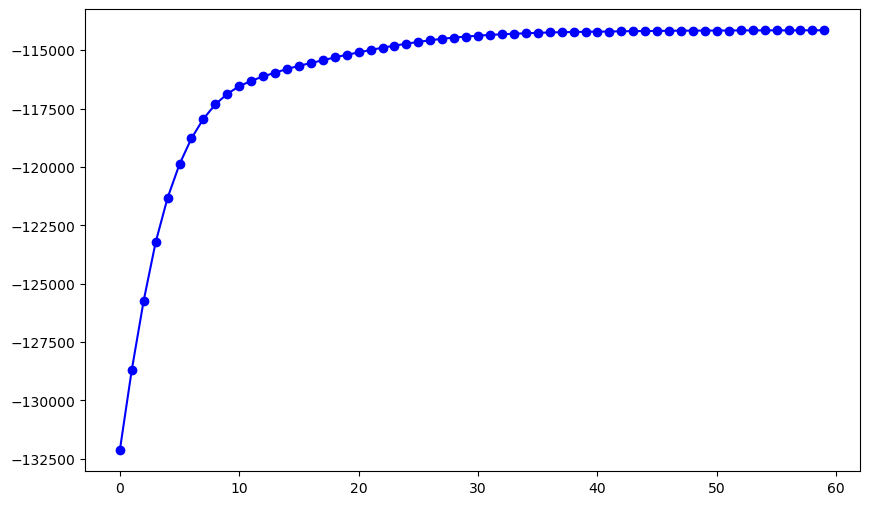

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

In [10]:
# Assuming 'Y' is the numpy array with your imputed data
# Also assuming 'original_values' is the original DataFrame before you removed 20% of the data
Y= mycebmf.Y_fit
# Extract the original values that were removed (same as before)
true_values = original_values.values[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]

# Extract the corresponding imputed values from Y
imputed_values = Y[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]

# Check if their shapes match
print(f"True values shape: {true_values.shape}")
print(f"Imputed values shape: {imputed_values.shape}")

# Calculate RMSE if shapes match
if true_values.shape == imputed_values.shape:
    rmse = np.sqrt(mean_squared_error(true_values, imputed_values))
    print(f'RMSE for your custom imputation method: {rmse}')
else:
    print("Error: Shape mismatch between true values and imputed values.")


True values shape: (20000,)
Imputed values shape: (20000,)
RMSE for your custom imputation method: 0.925393298632387


In [11]:
mycebmf.iter()

c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\cEBMF.py:327: RuntimeWarning: divide by zero encountered in power
  s_f = (denominator_f_hat) ** (-0.5)+1e-6


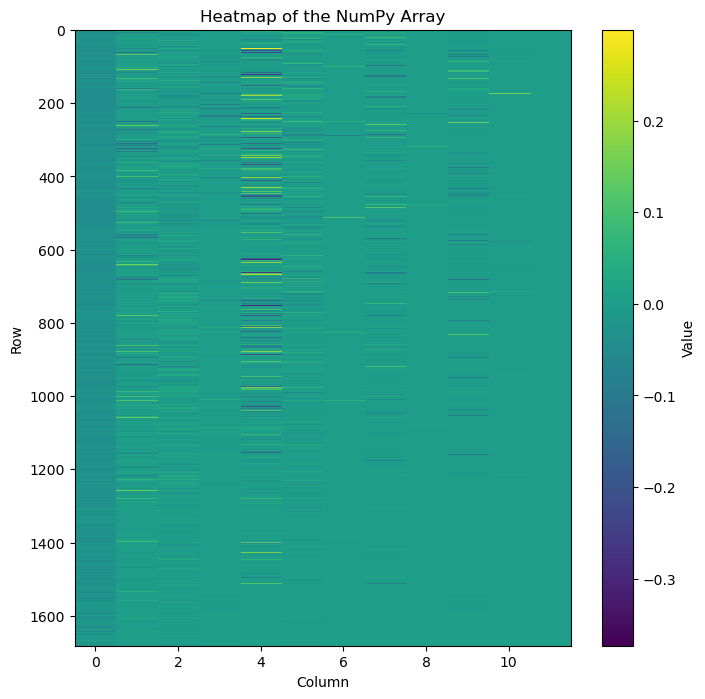

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming mycebmf.f is your NumPy array
plt.figure(figsize=(8, 8))  # You can adjust the size here
plt.imshow(mycebmf.F, cmap='viridis', aspect='auto', interpolation='nearest')  # 'aspect' set to auto for better scaling
plt.colorbar(label="Value")
plt.title("Heatmap of the NumPy Array")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()


In [13]:
k=1
mycebmf.cal_partial_residuals(k=k)
lhat , s_l  = compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau,
                                                            has_nan=mycebmf.has_nan)
 
betahat   =lhat
sebetahat =s_l 
prior     = mycebmf.prior_L
verbose=False
mult=np.sqrt(2) 



np.isinf (lhat ).any()
sebetahat 

array([ 1.26626662,  2.363966  ,  2.35418592,  3.30373486,  1.39929398,
        1.52795034,  1.01513932,  3.67207175,  4.67378188,  1.71366095,
        1.67518865,  2.99185168,  0.81806743,  2.27202605,  2.01599729,
        1.85401525,  4.58183855,  1.47276464,  4.54349197,  2.87230159,
        1.37142569,  1.62909804,  1.68460602,  2.59368105,  2.32175276,
        1.9213615 ,  4.46275329,  2.09558926,  4.37391849,  3.33243775,
        2.8911513 ,  2.71939965,  3.11231104,  3.63134041,  3.2575092 ,
        2.61507373,  3.35262239,  1.5387862 ,  3.88371164,  3.04711612,
        3.04036658,  1.47163331,  1.36990806,  1.68466221,  2.83518803,
        3.20678736,  2.95352716,  3.10086018,  1.32524649,  3.39843083,
        4.26169562,  2.7612514 ,  4.24752475,  2.13471211,  6.82591236,
        1.40148313,  2.03517507,  1.8490379 ,  1.05917048,  1.34613709,
        3.40873824,  1.64978626,  2.03202734,  1.60782107,  2.31458229,
        4.07748827,  4.58191701,  3.74566276,  2.80522272,  1.74

In [14]:
betahat

array([ 4.72873303e-01,  2.04887419e+00,  2.41761663e+00, -1.27238212e+00,
       -4.87410972e-01,  5.47438798e+00,  6.51311449e+00,  4.42407813e-01,
       -1.69163582e+00,  1.22508341e+00, -4.51004574e-01, -7.00484817e+00,
        6.37338022e-01,  1.07217148e-02, -9.67143216e-01,  2.49859590e+00,
       -2.03783350e+00, -1.22177361e+00,  3.87161495e+00,  1.87860332e+00,
       -1.72678572e+00, -8.11583622e+00, -1.67218871e+00, -4.85357378e+00,
       -6.81412848e+00,  1.26720852e+00, -3.46575708e+00, -7.78216657e+00,
       -5.77311083e+00,  1.04102508e+00,  2.26939054e+00, -3.18072986e+00,
       -2.79817556e-01, -1.77082237e+00,  9.22822186e-01,  1.28118863e+01,
       -2.61384059e+00,  8.97043206e-01,  8.04429934e+00, -1.98574864e+00,
        2.03458782e+00,  9.95589896e+00, -5.96669860e-01, -1.54287226e+00,
        1.87461330e+00, -2.37278132e+00,  1.07767420e+00,  1.90553661e+00,
        9.05360619e-01,  2.51118615e+00, -2.70900711e+00, -2.74764690e-01,
        3.33565505e+00, -

In [15]:


ash_obj = ash(betahat   =lhat,
                      sebetahat =s_l ,
                      prior     = mycebmf.prior_L,
                      verbose=False
                      )
print(ash_obj.post_mean)
mycebmf.L  [:,k] =ash_obj.post_mean
mycebmf.L2 [:,k] =ash_obj.post_mean2

[ 2.79874536e-02  2.26048414e-01  2.97778092e-01 -1.23821432e-01
 -3.08412747e-02  4.94000040e+00  6.32138784e+00  4.16795960e-02
 -1.60890568e-01  1.04889533e-01 -3.16976734e-02 -2.95737169e+00
  3.28502629e-02  8.74356958e-04 -8.11552073e-02  3.73288208e-01
 -1.98263029e-01 -1.02230434e-01  4.34086458e-01  1.95664395e-01
 -2.00708642e-01 -7.55450391e+00 -1.72075058e-01 -1.33955363e+00
 -4.77665159e+00  1.12426930e-01 -3.78300619e-01 -6.76240181e+00
 -8.54406406e-01  9.97574183e-02  2.52618143e-01 -4.52643800e-01
 -2.56955410e-02 -1.78740514e-01  8.76148364e-02  1.09616226e+01
 -2.95583091e-01  6.66887404e-02  2.32496076e+00 -2.09157198e-01
  2.15898291e-01  9.42186497e+00 -3.82952583e-02 -1.49579259e-01
  1.95275156e-01 -2.62247559e-01  1.02013780e-01  1.98152151e-01
  6.39861404e-02  2.78611399e-01 -2.83281053e-01 -2.44042150e-02
  3.70225322e-01 -8.63673135e+00  3.33046908e-01 -1.07982649e-01
 -8.46786883e-03 -5.52598426e+00 -6.27706010e+00 -5.26373755e-02
  7.39465550e-02 -4.87132

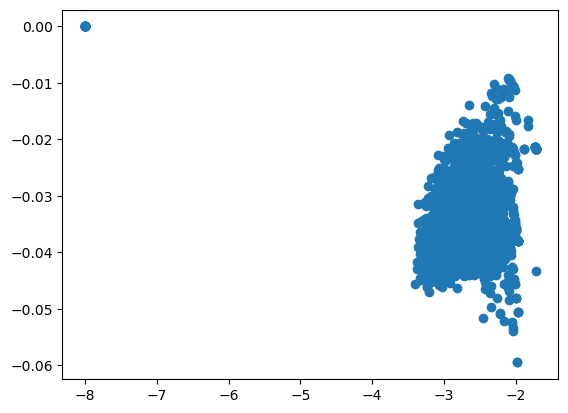

In [16]:
k=0
mycebmf.cal_partial_residuals(k=k)

fhat , s_f  = compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau,
                                                            has_nan=mycebmf.has_nan)
plt.scatter(np.log10(s_f), fhat)
betahat=fhat
sebetahat=s_f

In [17]:
scale=autoselect_scales_mix_exp(betahat  = betahat,
                                         sebetahat= sebetahat,
                                          mult=mult)
L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)
optimal_pi = optimize_pi_logL(  logL =L,
                                 penalty=10,
                                 verbose=verbose)  
log_pi=  np.tile(np.log(optimal_pi+1e-32), (betahat.shape[0],1))

In [18]:
penalty=10

n, K = L.shape  # n: number of data points, K: number of components
pi =np.exp( - np.arange(0,K) )/ np.sum( np.exp( - np.arange(0,K) ))  # Initialize pi uniformly
vec_pen= np.ones_like(pi)
vec_pen[0]= penalty
pi

optimal_pi=pi

log_pi=  np.tile(np.log(optimal_pi+1e-32), (betahat.shape[0],1))
        
out= posterior_mean_exp(betahat, sebetahat,
                                 log_pi=log_pi, 
                                 scale=scale)

out.post_mean

array([1.34632228e-08, 2.68916765e-07, 5.50481834e-07, ...,
       2.77373657e-04, 2.40532404e-04, 2.21145418e-04])

In [19]:
assignment = np.exp(log_pi)
assignment = assignment / assignment.sum(axis=1, keepdims=True)
mu = 0
post_assign = np.zeros((betahat.shape[0], scale.shape[0]))
    
for i in range(betahat.shape[0]):
        post_assign[i,] = wpost_exp(x=betahat[i],
                                    s=sebetahat[i], 
                                    w=assignment[i,],
                                    scale=scale) 
    
post_mean = np.zeros(betahat.shape[0])
post_mean2 = np.zeros(betahat.shape[0])



[0.00000000e+00 8.71893767e-04 1.23304399e-03 1.74378753e-03
 2.46608798e-03 3.48757507e-03 4.93217596e-03 6.97515013e-03
 9.86435192e-03 1.39503003e-02 1.97287038e-02 2.79006005e-02
 3.94574077e-02 5.58012011e-02 7.89148153e-02 1.11602402e-01
 1.57829631e-01 2.23204804e-01 3.15659261e-01 4.46409609e-01
 6.31318523e-01 8.92819217e-01]
-475205.0212638507
[0.00045821 0.00089314 0.00101862 ... 0.00961846 0.0105172  0.00905443]


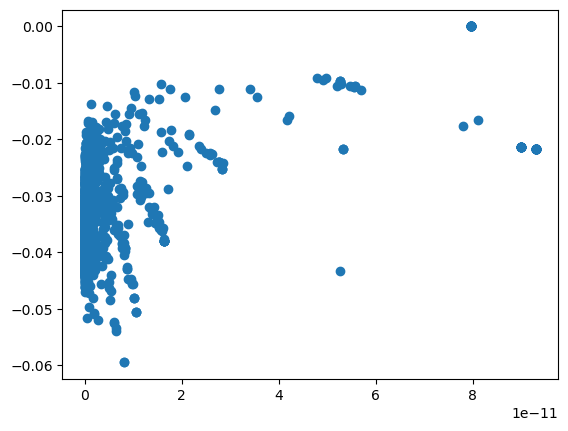

In [20]:


ash_obj = ash(betahat   =10*fhat,
                      sebetahat =s_f+1e-3 ,
                      prior     = "exp",
                      verbose=False
                      )
print(ash_obj.scale)

mycebmf.F  [:,k] =ash_obj.post_mean
mycebmf.F2 [:,k] =ash_obj.post_mean2
print(ash_obj.log_lik)

print(s_f)
 
plt.scatter(ash_obj.post_mean, fhat)

In [21]:
ash_obj.pi

array([9.99999769e-01, 2.10393821e-07, 1.86283163e-08, 1.51307923e-09,
       1.15978174e-10, 1.09720027e-11, 3.00148841e-12, 1.87752133e-12,
       1.34381224e-12, 9.67733286e-13, 6.94057073e-13, 4.95897167e-13,
       3.53298047e-13, 2.51172892e-13, 1.78293939e-13, 1.26420853e-13,
       8.95685392e-14, 6.34226885e-14, 4.48909587e-14, 3.17649842e-14,
       2.24723322e-14, 1.58959514e-14])

In [22]:
betahat   =fhat 
sebetahat =s_f  +1e-7
prior     = mycebmf.prior_F 

In [23]:
scale=autoselect_scales_mix_exp(betahat  = betahat,
                                         sebetahat= sebetahat,
                                          mult=np.sqrt(2))

L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)
optimal_pi = optimize_pi( np.exp(L),
                                 penalty=10,
                                 verbose=True)  
log_pi=  np.tile(np.log(optimal_pi+1e-32), (betahat.shape[0],1))
        
out= posterior_mean_exp(betahat, sebetahat,
                                 log_pi=log_pi, 
                                 scale=scale)

Converged after 12 iterations.


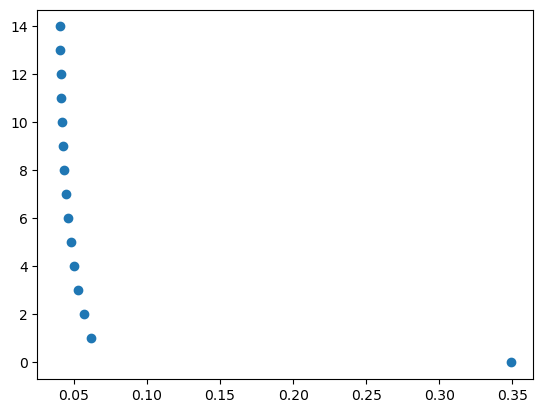

In [24]:
optimal_pi
plt.scatter(optimal_pi, range(optimal_pi.shape[0]))





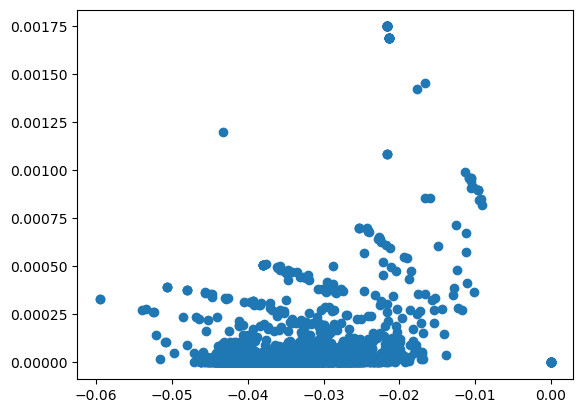

In [25]:
plt.scatter(fhat,out.post_mean )

In [26]:
L

array([[-3.87289925e+03, -3.87814953e+03, -3.87849457e+03, ...,
        -3.88195670e+03, -3.88230324e+03, -3.88264978e+03],
       [-7.00038360e+02, -7.03788566e+02, -7.04128233e+02, ...,
        -7.07577630e+02, -7.07924048e+02, -7.08270511e+02],
       [-4.31553263e+02, -4.34943573e+02, -4.35280238e+02, ...,
        -4.38722411e+02, -4.39068759e+02, -4.39415174e+02],
       ...,
       [ 9.40832049e-01,  7.17396452e-01,  6.35130410e-01, ...,
        -1.65587241e+00, -1.98232050e+00, -2.31445121e+00],
       [-2.76914536e+00, -3.06346399e+00, -3.16555643e+00, ...,
        -5.61331012e+00, -5.94357652e+00, -6.27847144e+00],
       [-2.58783705e+00, -2.92245141e+00, -3.03578381e+00, ...,
        -5.57195799e+00, -5.90438054e+00, -6.24083690e+00]])

In [27]:
scale=autoselect_scales_mix_exp(betahat  = betahat,
                                         sebetahat= sebetahat,
                                          mult=np.sqrt(2))
L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)
optimal_pi = optimize_pi( np.exp(L),
                                 penalty=penalty,
                                 verbose=verbose)  
log_pi=  np.tile(np.log(optimal_pi+1e-32), (betahat.shape[0],1))
        
out= posterior_mean_exp(betahat, sebetahat,
                                 log_pi=log_pi, 
                                 scale=scale)

NameError: name 'sigmaamax' is not defined

In [29]:
s_f=1e-8+s_f

In [ ]:
betahat   =lhat
sebetahat =s_l 
prior     = mycebmf.prior_L
verbose=False
mult=np.sqrt(2)

plt.scatter(betahat, sebetahat)

In [ ]:
np.sqrt(1e-32)
 
plt.scatter(betahat,np.log(sebetahat))
plt.axvline(x=0, color='red', linestyle='--')  # Add a horizontal line at y=0

In [ ]:
ash_obj.post_mean

In [ ]:
plt.scatter(s_f, fhat)

In [ ]:
res= ash(betahat=fhat, sebetahat=s_f, prior="exp")

In [ ]:
plt.hist(np.log10(s_f))